In [35]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import IncrementalPCA as PCA
from numba import jit
import cPickle as pickle

In [9]:
# load centroids from GPU clustering
cen = np.load('../table_compression/kmcuda_4000_clusters_centroids.npy')
assign = np.load('../table_compression/kmcuda_4000_clusters_assignements_list.npy')

In [84]:
# load centroids from GPU clustering random subsampling
cen_rand = np.load('../table_compression/kmcuda_4000_clusters_centroids_rand.npy')
assign_rand = np.load('../table_compression/kmcuda_4000_clusters_assignements_rand.npy')

In [16]:
cen = np.nan_to_num(cen)
k_means = KMeans(cen.shape[0])
k_means.cluster_centers_ = cen

In [85]:
cen_rand = np.nan_to_num(cen_rand)
k_means_rand = KMeans(cen_rand.shape[0])
k_means_rand.cluster_centers_ = cen_rand

In [7]:
cluster_data = np.load('../table_compression/cluster_data.fp32.npy')

In [56]:
%%time
gpu_labels = k_means.predict(cluster_data[:1000000])

In [121]:
%%time
gpu_labels_rand = k_means_rand.predict(cluster_data)

CPU times: user 24min, sys: 1min 1s, total: 25min 1s
Wall time: 25min 2s


In [36]:
with open('../table_compression/kmeans_4000_clusters.pkl', 'rb') as f:
    cpu_kmeans = pickle.load(f)

In [95]:
%%time
cpu_labels = cpu_kmeans.predict(cluster_data[:10000000])

Computing label assignment and total inertia
CPU times: user 6min 31s, sys: 8.38 s, total: 6min 39s
Wall time: 6min 39s


In [75]:
cpu_labels_for_gpu_centroids = cpu_kmeans.predict(cen)

Computing label assignment and total inertia


In [87]:
cpu_labels_for_gpu_rand_centroids = cpu_kmeans.predict(cen_rand)

Computing label assignment and total inertia


In [96]:
#translated_labels = cpu_labels_for_gpu_centroids[gpu_labels]
translated_labels_rand = cpu_labels_for_gpu_rand_centroids[gpu_labels_rand]

In [102]:
#f = plt.figure(figsize=(10,10))
#p = plt.hist2d(cpu_labels, translated_labels_rand, bins=np.arange(0,4001),cmap='BuGn')

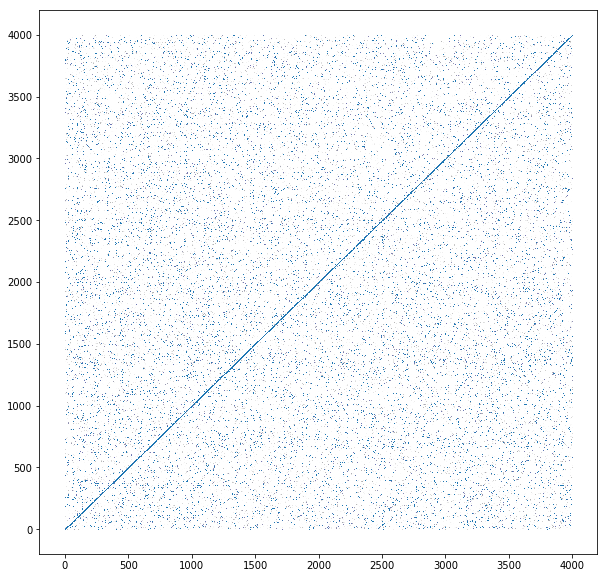

In [101]:
f = plt.figure(figsize=(10,10))
plt.scatter(cpu_labels, translated_labels_rand, alpha=0.01, marker='.', s=0.1)

In [123]:
freq, _ = np.histogram(gpu_labels_rand, bins=np.arange(4001))

In [135]:
sum(freq)/4000

14627

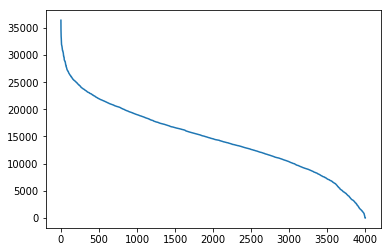

In [129]:
plt.plot(sorted(freq, reverse=True))
#plt.gca().set_yscale('log')
#plt.gca().set_xscale('log')

In [333]:
final_templates = np.load('../table_compression/final_templates.npy')
#final_templates_sklearn = np.load('../table_compression/final_templates_sklearn.npy')
#templates = np.load('/data/icecube/retro_tables/large_5d_notilt_combined/large_5d_notilt_string_dc_depth_0/templates.npy')
#templates_sklearn = np.load('/data/icecube/retro_tables/large_5d_notilt_combined/large_5d_notilt_string_dc_depth_0/templates_sklearn.npy')

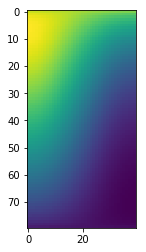

In [356]:
plt.imshow(final_templates[777])

In [339]:
for i in range(8):
    fig, axes = plt.subplots(figsize=(20, 30), ncols=20, nrows=25)
    offset = i*500
    for j in range(500):
        axes[j/20,j%20].imshow(final_templates[offset+j])
        axes[j/20,j%20].set_xticks([])
        axes[j/20,j%20].set_yticks([])
    plt.savefig('labels_part%i.png'%i, dpi=600)
    plt.clf()